# Normal Distribution

This is the probability density function in latex.

$ \frac{1} {\sigma \sqrt { 2 \pi }} e -\frac{1}{2}  (\frac{ x - \mu } {\sigma})^2 \\[1ex] $ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A Normal Distribution is also known as a Gaussian distribution or famously Bell Curve. People use both words interchangeably, but it means the same thing. It is a continuous probability distribution.[1]

I firstly used numpy random to draw random samples from a normal (Gaussian) distribution. The probability density function of the normal distribution, first derived by De Moivre and 200 years later by both Gauss and Laplace independently, is often called the bell curve because of its characteristic shape (see the example below).The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution [2].

Probability Density Function for Gaussian distribution in Latex:

$ p(x) = \frac{1} {\sqrt { 2 \pi \sigma^2 }} e - (\frac{ (x - \mu) ^2 } {2\sigma^2}) \\[1ex] $ 

In [11]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
## generates a hundred numbers based on sigma

print (s)

[-5.72491126e-02 -4.08048716e-02  6.26461483e-02 -1.67179429e-01
  5.66310444e-02  1.36068921e-02  9.96917975e-02 -3.53372859e-02
 -7.17544691e-02  3.45388386e-02 -1.43403621e-01  1.05727427e-01
  3.78052872e-02  8.78765079e-03  1.11747658e-01 -3.77508603e-02
  6.74064387e-02 -4.13510093e-02  4.30687390e-02 -6.53710906e-02
 -1.12613283e-03 -1.04008980e-01  4.68519177e-02 -1.17923454e-02
  1.36707256e-01  1.78398297e-01 -4.00827652e-02  2.20823713e-02
  1.20661757e-01 -2.96376097e-02 -6.43366773e-02 -2.82714466e-01
 -2.68384972e-02  5.12850051e-02 -8.39838336e-02  7.35495824e-02
  2.43601616e-01  1.64556643e-01 -9.16176332e-02 -5.20009148e-02
  2.31677527e-01 -1.67665848e-01  7.81149864e-02  8.64955920e-02
 -1.98974358e-01  1.03588155e-01 -7.77799401e-02  5.31921827e-02
 -4.96860482e-02  2.05254243e-01  1.99950032e-01  2.00528690e-02
  3.78242225e-02 -5.38279759e-02  1.77762864e-02 -4.19716921e-02
  2.76179720e-02 -2.30539216e-03  5.63651521e-02 -5.18375237e-02
  8.91402456e-02 -2.55677

In [12]:
abs(mu - np.mean(s))

## abs returns the absolute value of the specified number

## verifies the mean and the variance of the numbers above

0.0036791226065646053

In [13]:
abs(sigma - np.std(s, ddof=1))

## ddof=1 provides an unbiased estimator of the variance of the infinite population.

## generates the sigma - standard deviation 

0.0004326913127604276

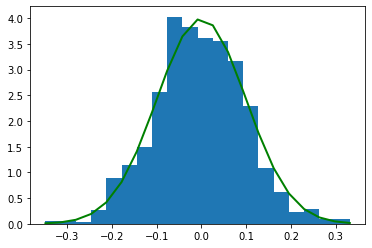

In [17]:
## code adapted from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

count, bins, ignored = plt.hist(s, 20, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         ## standard deviation formula based on the latex formula from above
         linewidth=2, color='g')
plt.show()

This will display a histogram of the samples in the probability density function.

It looks like a bell curve based on the formula which we used above based on the derivation by De Moivre.

References Used in Notebook

[1] https://www.askpython.com/python/normal-distribution

[2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html